<small><small><i>
All the IPython Notebooks in **Python Data Analytics Projects** lecture series by **[Dr. Milaan Parmar](https://www.linkedin.com/in/milaanparmar/)** are available @ **[GitHub](https://github.com/milaan9/93_Python_Data_Analytics_Projects)**
</i></small></small>

# Predicting Loose Implants from HIP X-Ray Images

### STEP 1: IMPORTING LIBRARIES

In [4]:
!pip install tensorflow
!pip install numpy
!pip install tensorflow


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D,Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image



DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


# STEP 2: importing images

In [4]:
# CLONING THE DATASET FROM THE GITHUB REPOSITORY

In [5]:
import os

img_dir = r'C:\Users\tasmi\Desktop\Portfolio\Hip implant\dataset\data'

# SETTING TRAIN AND TEST DIRECTORY
train_dir = os.path.join(img_dir, "train")
test_dir = os.path.join(img_dir, "test")

#SETING DIRECTORY FOR COVID AND NORMAL IMAGES DIRECTORY
train_loose_dir = os.path.join(train_dir, "Loose")
train_control_dir = os.path.join(train_dir, "Control")

test_loose_dir = os.path.join(test_dir, "Loose")
test_control_dir = os.path.join(test_dir, "Control")


In [6]:
# MAKING SEPERATE FILES : 
train_loose_names = os.listdir(train_loose_dir)
train_control_names = os.listdir(train_control_dir)

test_loose_names = os.listdir(test_loose_dir)
test_control_names = os.listdir(test_control_dir)

### STEP 3: PERFORMING DATA VISUALIZATION

['C:\\Users\\tasmi\\Desktop\\Portfolio\\Hip implant\\dataset\\data\\train\\Loose\\loose (100).png', 'C:\\Users\\tasmi\\Desktop\\Portfolio\\Hip implant\\dataset\\data\\train\\Loose\\loose (101).png', 'C:\\Users\\tasmi\\Desktop\\Portfolio\\Hip implant\\dataset\\data\\train\\Loose\\loose (102).png', 'C:\\Users\\tasmi\\Desktop\\Portfolio\\Hip implant\\dataset\\data\\train\\Loose\\loose (103).png', 'C:\\Users\\tasmi\\Desktop\\Portfolio\\Hip implant\\dataset\\data\\train\\Loose\\loose (104).png', 'C:\\Users\\tasmi\\Desktop\\Portfolio\\Hip implant\\dataset\\data\\train\\Loose\\loose (105).png', 'C:\\Users\\tasmi\\Desktop\\Portfolio\\Hip implant\\dataset\\data\\train\\Loose\\loose (106).png', 'C:\\Users\\tasmi\\Desktop\\Portfolio\\Hip implant\\dataset\\data\\train\\Loose\\loose (107).png']
['C:\\Users\\tasmi\\Desktop\\Portfolio\\Hip implant\\dataset\\data\\train\\Control\\control (21).png', 'C:\\Users\\tasmi\\Desktop\\Portfolio\\Hip implant\\dataset\\data\\train\\Control\\control (22).png', 'C

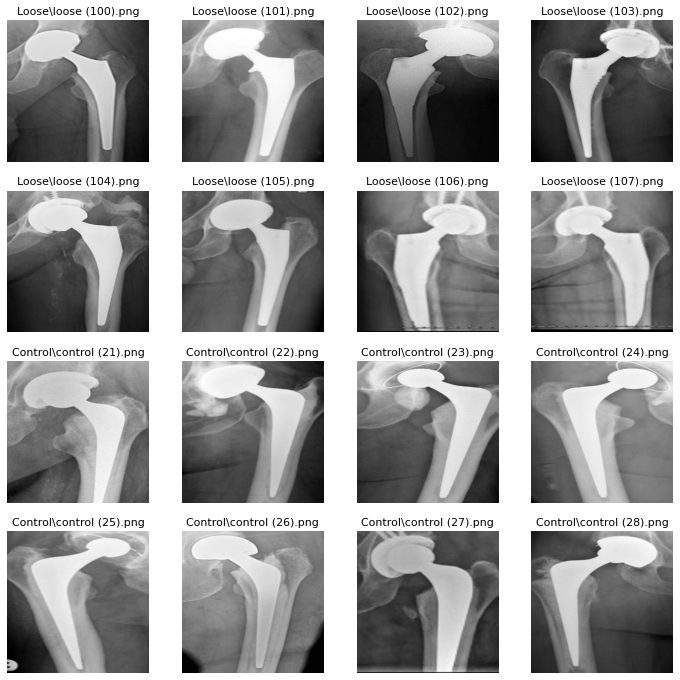

In [22]:
import matplotlib.image as mpimg

rows = 4
columns = 4

fig = plt.gcf()
fig.set_size_inches(12,12)

loose_img = [os.path.join(train_loose_dir, filename) for filename in train_loose_names[0:8]]
control_img = [os.path.join(train_control_dir, filename) for filename in train_control_names[0:8]]

print(loose_img)
print(control_img)

merged_img = loose_img + control_img

for i, img_path in enumerate(merged_img):
  title = img_path.split("\\", 9)[9]
  plot = plt.subplot(rows, columns, i+1)
  plot.axis("Off")
  img = mpimg.imread(img_path)
  plot.set_title(title, fontsize = 11)
  plt.imshow(img, cmap= "gray")

plt.show()

# 4) DATA PREPROCESSING AND AUGMENTATION

In [23]:
# CREATING TRAINING, TESTING AND VALIDATION BATCHES

dgen_train = ImageDataGenerator(rescale = 1./255,
                                validation_split = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True)

dgen_validation = ImageDataGenerator(rescale = 1./255,
                                     )

dgen_test = ImageDataGenerator(rescale = 1./255,
                              )

train_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size = (150, 150), 
                                                 subset = 'training',
                                                 batch_size = 32,
                                                 class_mode = 'binary')
validation_generator = dgen_train.flow_from_directory(train_dir,
                                                      target_size = (150, 150), 
                                                      subset = "validation", 
                                                      batch_size = 32, 
                                                      class_mode = "binary")
test_generator = dgen_test.flow_from_directory(test_dir,
                                               target_size = (150, 150), 
                                               batch_size = 32, 
                                               class_mode = "binary")




Found 134 images belonging to 2 classes.
Found 32 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [24]:
print("Class Labels are: ", train_generator.class_indices)
print("Image shape is : ", train_generator.image_shape)

Class Labels are:  {'Control': 0, 'Loose': 1}
Image shape is :  (150, 150, 3)


### STEP 5: BUILDING CONVOLUTIONAL NEURAL NETWORK MODEL

In [25]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model = Sequential()

# 1) CONVOLUTIONAL LAYER - 1
model.add(Conv2D(32, (5,5), padding = "same", activation = "relu", input_shape = train_generator.image_shape))

# 2) POOLING LAYER - 1
model.add(MaxPooling2D(pool_size=(2,2)))

# 3) DROPOUT LAYER -2
model.add(Dropout(0.5))

# 4) CONVOLUTIONAL LAYER - 2
model.add(Conv2D(64, (5,5), padding = "same", activation = "relu"))

# 5) POOLING LAYER - 2
model.add(MaxPooling2D(pool_size=(2,2)))

# 6) DROPOUT LAYER - 2
model.add(Dropout(0.5))

# 7) FLATTENING LAYER TO 2D SHAPE
model.add(Flatten())

# 8) ADDING A DENSE LAYER
model.add(Dense(256, activation = 'relu'))

# 9 DROPOUT LAYER - 3
model.add(Dropout(0.5))

# 10) FINAL OUTPUT LAYER
model.add(Dense(1, activation = 'sigmoid'))

### PRINTING MODEL SUMMARY
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 64)        0

### STEP 6: COMPILING AND TRAINING THE NEURAL NETWORK MODEL

In [26]:
# COMPILING THE MODEL

model.compile(Adam(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [27]:
# TRAINING THE MODEL
history = model.fit(train_generator, 
                    epochs = 35, 
                    validation_data = validation_generator)

Epoch 1/35
5/5 [==============================] - 5s 1s/step - loss: 4.3472 - accuracy: 0.5224 - val_loss: 0.7047 - val_accuracy: 0.4375
Epoch 2/35
5/5 [==============================] - 3s 612ms/step - loss: 1.0471 - accuracy: 0.4851 - val_loss: 0.6926 - val_accuracy: 0.5625
Epoch 3/35
5/5 [==============================] - 3s 608ms/step - loss: 0.6918 - accuracy: 0.5373 - val_loss: 0.6923 - val_accuracy: 0.5625
Epoch 4/35
5/5 [==============================] - 3s 616ms/step - loss: 0.6916 - accuracy: 0.5746 - val_loss: 0.6920 - val_accuracy: 0.5625
Epoch 5/35
5/5 [==============================] - 3s 697ms/step - loss: 0.6896 - accuracy: 0.5672 - val_loss: 0.6917 - val_accuracy: 0.5625
Epoch 6/35
5/5 [==============================] - 3s 613ms/step - loss: 0.6878 - accuracy: 0.5522 - val_loss: 0.6916 - val_accuracy: 0.5625
Epoch 7/35
5/5 [==============================] - 3s 600ms/step - loss: 0.7069 - accuracy: 0.5522 - val_loss: 0.6915 - val_accuracy: 0.5625
Epoch 8/35
5/5 [=======

# 7) PERFORMING EVALUATION


In [28]:
# KEYS OF HISTORY OBJECT
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

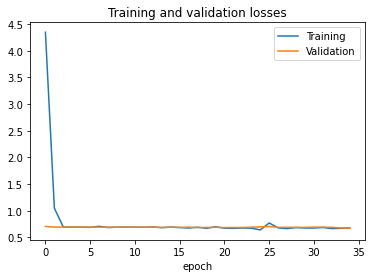

In [29]:
# PLOT GRAPH BETWEEN TRAINING AND VALIDATION LOSS
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title("Training and validation losses")
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

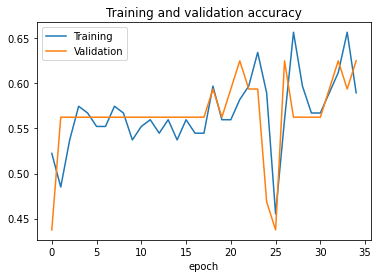

In [32]:
# PLOT GRAPH BETWEEN TRAINING AND VALIDATION ACCURACY
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title("Training and validation accuracy")
plt.xlabel('epoch')

In [33]:
# GETTING TEST ACCURACY AND LOSS

test_loss, test_acc = model.evaluate(test_generator)
print("Test Set Loss : ", test_loss)
print("Test Set Accuracy : ", test_acc)

2/2 [==============================] - 1s 81ms/step - loss: 0.7209 - accuracy: 0.5250
Test Set Loss :  0.7209010720252991
Test Set Accuracy :  0.5249999761581421


### STEP 7: PREDICTION ON NEW DATA (UPLOAD FILES)

In [35]:
#from google.colab import files
#from keras.preprocessing import image

uploaded = files.upload()

for filename in uploaded.keys():
  img_path = '/content/' + filename
  img = image.load_img(img_path, target_size = (150,150))
  images = image.img_to_array(img)
  images = np.expand_dims(images, axis = 0)
  prediction = model.predict(images)
  
  if prediction == 1:
    print("The report shows a loose hip implant")
  else:
    print("The report shows a normal hip implant")

NameError: name 'files' is not defined

In [ ]:
model.save("model.h5")